In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation,BatchNormalization
from keras.preprocessing.image import img_to_array,load_img
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
#Matplotlib relies on the Pillow library to load image data.

# import the opencv library
import cv2

In [2]:
dimension = 48

In [3]:
model = keras.models.load_model('AgeModel/age128-model-test-2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)            

In [4]:
layer_outputs = [layer.output for layer in model.layers[1:]]

In [6]:
visualize_model = keras.models.Model(inputs= model.input,outputs = layer_outputs)

In [18]:
img =load_img('./testing/25_1_3_first.jpg',target_size=(128,128))
img_grey = img.convert('L')

In [19]:
x = img_to_array(img_grey)

In [20]:
x.shape

(128, 128, 1)

In [22]:
x = x.reshape(1,128,128,1)
print(x.shape)

(1, 128, 128, 1)


In [23]:
x=x/255

In [24]:
feature_maps = visualize_model.predict(x)
print(len(feature_maps))

9


In [25]:
layer_names = [layer.name for layer in model.layers]
print(layer_names)

['conv2d_1', 'max_pooling2d', 'conv2d_2', 'max_pooling2d_1', 'conv2d_3', 'max_pooling2d_2', 'flatten', 'dense', 'dense_1', 'dense_2']


#actual printing

(1, 64, 64, 16)
(1, 64, 64, 32)
(1, 32, 32, 32)
(1, 32, 32, 64)
(1, 16, 16, 64)
(1, 16384)
(1, 128)
(1, 64)
(1, 6)


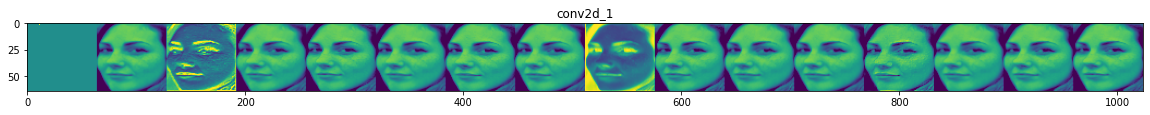

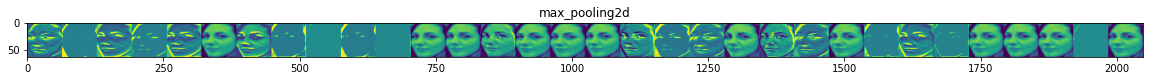

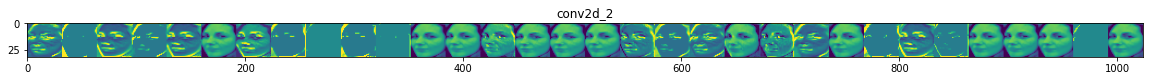

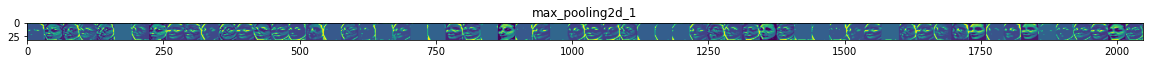

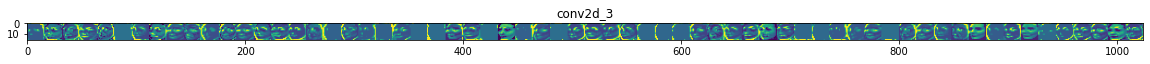

In [26]:
for layer_names, feature_maps in zip(layer_names,feature_maps):
    print(feature_maps.shape)
    if len(feature_maps.shape) == 4:
        channels =feature_maps.shape[-1]
        size = feature_maps.shape[1]
        display_grid = np.zeros((size,size*channels))
        for i in range(channels):
            x = feature_maps[0,:,:,i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0,255).astype('uint8')

            display_grid[:,i*size:(i+1)*size] =x

        scale =20./channels
        plt.figure(figsize=(scale*channels,scale))
        plt.title(layer_names)
        plt.grid(False)
        plt.imshow(display_grid,aspect='auto', cmap='viridis')
